In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv



<h2>Natural Language Processing with Disaster Tweets</h2>
<h3>Project Overview</h3>

This project involves developing a Natural Language Processing (NLP) model to classify tweets into two categories: those related to real disasters and those that are not. <br> The goal is to analyze and understand the dynamics of disaster-related communication on social media platforms like Twitter.


<h3>Objectives</h3>

Preprocess and Explore Dataset: Utilize pandas for data handling and matplotlib for visualizing the distribution of disaster and non-disaster tweets.<br>

Model Development: Implement and train neural network models using TensorFlow and Keras for tweet classification.<br>

Model Evaluation and Optimization: Assess model performance and optimize using various metrics and techniques like early stopping.<br>


## Setup

<h3>Technologies and Libraries</h3>

***Python*** <br>
Data Manipulation: ***pandas***, ***NumPy*** <br>
Visualization: ***matplotlib*** <br>
Deep Learning: ***TensorFlow***, ***Keras*** <br>

In [2]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h3>Dataset </h3>
Source: The dataset consists of tweets categorized as being about real disasters or not. <br>
Structure: Each tweet is represented by its text content along with metadata like 'id', 'keyword', and 'location'. <br>

In [3]:
from pathlib import Path
training_csv_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
testing_csv_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

training_csv_data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


<h3>Data Preparation and Exploration </h3>
Data Loading: Read datasets using pandas for training and testing. <br>
Visualization: Graphically represent the distribution of disaster and non-disaster tweets to understand the dataset's balance. <br>

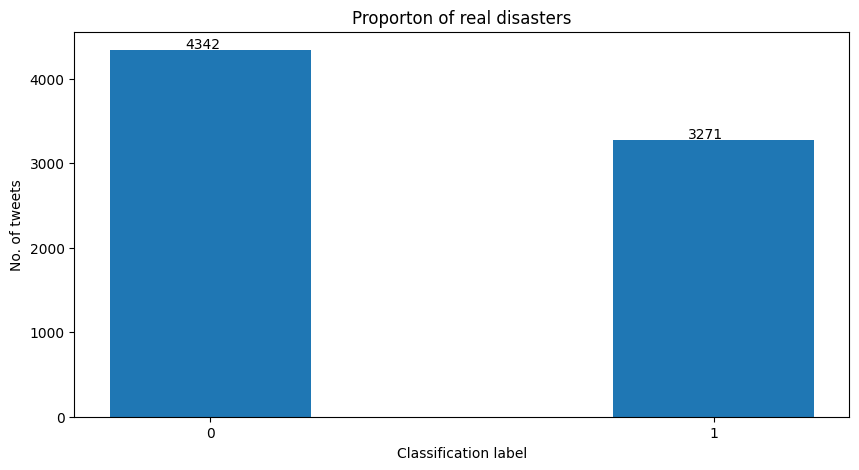

In [4]:
data = training_csv_data["target"].value_counts()
topics = list(data.axes[0])
topics = [str(item) for item in topics]
values = list(data.values)
  
fig = plt.figure(figsize = (10, 5))
plt.bar(topics, values, width = 0.4)

for i in range(len(values)):
        plt.text( i-0.05, values[i]+20, values[i])

plt.xlabel("Classification label")
plt.ylabel("No. of tweets")
plt.title("Proporton of real disasters")
plt.show()

<h3>Dataset Construction </h3>
First, to be able to properly inport all samples as a Keras dataset, each text in the training dataset will be exported as a ".txt" file, seperated according to their label.

In [5]:
from pathlib import Path
Path('/kaggle/working/train/1').mkdir(parents=True, exist_ok=True)
Path('/kaggle/working/train/0').mkdir(parents=True, exist_ok=True)
training_directory = "/kaggle/working/train/"

for ind in training_csv_data.index:
    # Create filename using label and ID
    filename = training_directory + str(training_csv_data["target"][ind]) + "/" + str(training_csv_data["id"][ind]) + ".txt"
    print(filename)
    
    # Export the sample's text
    text_file = open(filename, "w", encoding="utf-8")
    text_file.write(training_csv_data["text"][ind])
    text_file.close()

/kaggle/working/train/1/1.txt
/kaggle/working/train/1/4.txt
/kaggle/working/train/1/5.txt
/kaggle/working/train/1/6.txt
/kaggle/working/train/1/7.txt
/kaggle/working/train/1/8.txt
/kaggle/working/train/1/10.txt
/kaggle/working/train/1/13.txt
/kaggle/working/train/1/14.txt
/kaggle/working/train/1/15.txt
/kaggle/working/train/1/16.txt
/kaggle/working/train/1/17.txt
/kaggle/working/train/1/18.txt
/kaggle/working/train/1/19.txt
/kaggle/working/train/1/20.txt
/kaggle/working/train/0/23.txt
/kaggle/working/train/0/24.txt
/kaggle/working/train/0/25.txt
/kaggle/working/train/0/26.txt
/kaggle/working/train/0/28.txt
/kaggle/working/train/0/31.txt
/kaggle/working/train/0/32.txt
/kaggle/working/train/0/33.txt
/kaggle/working/train/0/34.txt
/kaggle/working/train/0/36.txt
/kaggle/working/train/0/37.txt
/kaggle/working/train/0/38.txt
/kaggle/working/train/0/39.txt
/kaggle/working/train/0/40.txt
/kaggle/working/train/0/41.txt
/kaggle/working/train/0/44.txt
/kaggle/working/train/1/48.txt
/kaggle/workin

In [6]:
# from pathlib import Path
Path('/kaggle/working/test/1').mkdir(parents=True, exist_ok=True)
Path('/kaggle/working/test/0').mkdir(parents=True, exist_ok=True)
testing_directory = "/kaggle/working/test/"

# For all files in testing directory
for ind in testing_csv_data.index:
    # Create filename using ID
#     filename = testing_directory + str(testing_csv_data["target"][ind]) + "/" + str(testing_csv_data["id"][ind]) + ".txt"
    filename = testing_directory + str(testing_csv_data["id"][ind]) + ".txt"
    # Export the sample's text
    text_file = open(filename, "w", encoding="utf-8")
    text_file.write(testing_csv_data["text"][ind])
    text_file.close()

Then, we import the training samples using the text_dataset_from_directory() function and create a validation split with 15% of the samples.

In [7]:
training_dataset, validation_dataset = tf.keras.utils.text_dataset_from_directory(
    training_directory,
    label_mode="binary",
    validation_split=0.15,
    shuffle=True,
    batch_size=None,
    subset="both",
    seed=1337,
)

Found 7613 files belonging to 2 classes.
Using 6472 files for training.
Using 1141 files for validation.


In [8]:
testing_dataset = tf.keras.utils.text_dataset_from_directory(
    testing_directory,
    labels=None,
    label_mode=None,
    batch_size=None,
    shuffle=False
)

Found 3263 files belonging to 1 classes.


In [9]:
for root, dirs, files in os.walk(testing_directory, topdown=False):
    testing_ids = [name[:len(name)-4] for name in files]
print(len(testing_ids))

3263


To properly use the datasets during vectorization, we split them into 32-item batches. Once again, only training and validation datasets are shuffled.

In [10]:
BUFFER_SIZE = 1000
BATCH_SIZE = 32

training_dataset_ = training_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_ = validation_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
testing_dataset_ = testing_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

<h2>Model Architecture</h2>
<h3>Model Selection</h3>

We create an encoding layer using ***TextVectorization()*** that has been adapted with the training dataset texts.

In [11]:
encoder = layers.TextVectorization(max_tokens=1000)
encoder.adapt(training_dataset_.map(lambda text, label: text))

Then, we create a sequential model to encode the inputs, pass them through a bidirectional LSTM model and then use a Dense layer to obtain the final output.

In [12]:
model = tf.keras.Sequential([
    encoder,
    layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=300,
        mask_zero=True),
    layers.Bidirectional(layers.LSTM(1)),
    layers.Dense(1, activation="sigmoid")
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 300)         300000    
                                                                 
 bidirectional (Bidirection  (None, 2)                 2416      
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 302419 (1.15 MB)
Trainable params: 302419 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h3>Model Training</h3>
For training the model a maximum of 20 epochs will be used, with an early stopping optimizer with a patience of 3 epochs.

The model's loss will be calculated using Binary Cross-Entropy. The metrics for Accuracy, Precision and Recall will also be calculated to evaluate the learning rate after training is complete

In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


model.compile(
    optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    loss="binary_crossentropy",
    metrics=[
             keras.metrics.BinaryAccuracy(),
             keras.metrics.Precision(name="precision"),
             keras.metrics.Recall(name="recall")
             ],
)

# Train model
history = model.fit(
    training_dataset_,
    epochs=20,
    validation_data=validation_dataset_,
    callbacks=[early_stopping_cb]
) 

Epoch 1/20
203/203 [==============================] - 29s 79ms/step - loss: 0.6721 - binary_accuracy: 0.6230 - precision: 0.9078 - recall: 0.1347 - val_loss: 0.6522 - val_binary_accuracy: 0.6275 - val_precision: 0.9487 - val_recall: 0.1495
Epoch 2/20
203/203 [==============================] - 5s 26ms/step - loss: 0.6044 - binary_accuracy: 0.7210 - precision: 0.8899 - recall: 0.3988 - val_loss: 0.5765 - val_binary_accuracy: 0.7397 - val_precision: 0.8345 - val_recall: 0.4990
Epoch 3/20
203/203 [==============================] - 4s 18ms/step - loss: 0.5212 - binary_accuracy: 0.7871 - precision: 0.8471 - recall: 0.6146 - val_loss: 0.5236 - val_binary_accuracy: 0.7572 - val_precision: 0.8364 - val_recall: 0.5475
Epoch 4/20
203/203 [==============================] - 4s 18ms/step - loss: 0.4689 - binary_accuracy: 0.8095 - precision: 0.8474 - recall: 0.6780 - val_loss: 0.4964 - val_binary_accuracy: 0.7826 - val_precision: 0.8276 - val_recall: 0.6303
Epoch 5/20
203/203 [=======================

# Model Results
To evaluate the model's training efficiency we can plot the evaluation metrics across time for each epoch.

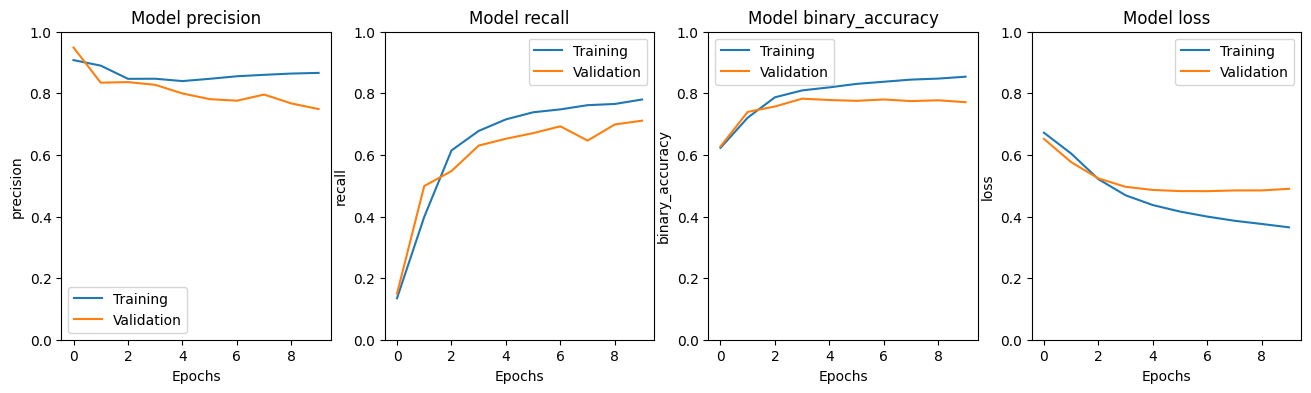

In [14]:
graph_metrics = ["precision", "recall", "binary_accuracy", "loss"]

fig, ax = plt.subplots(1, len(graph_metrics), figsize=(16, 4))
ax = ax.ravel()

for i, metric in enumerate(graph_metrics):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model " + metric)
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["Training", "Validation"])
    ax[i].set_ylim(ymin=0, ymax=1)

Finally, we can make a prediction onto the testing dataset and export it into a CSV file for submittion onto Kaggle.

In [15]:
testing_predictions = model.predict(testing_dataset_)
testing_prediction_labels = [round(item[0]) for item in testing_predictions.tolist()]


testing_results = pd.DataFrame({"id": testing_ids, "target": testing_prediction_labels})
testing_results = testing_results.sort_values(by=['id'], ascending=True)


testing_results.to_csv("/kaggle/working/submission1.csv", index=False)
testing_results.head()

102/102 [==============================] - 3s 4ms/step


,id,target
1662,0,0
2287,1000,0
2952,10002,1
548,10007,1
2669,10015,1


# Alternative Models

# First Alternative

Firstly, we will observe the results of adding a second Dense layer to better process the output of the first LSTM layer. For this, the output of the first LSTM model will be increased to 100 and the new Dense layer will have 30 outputs.

In [16]:
# Define model's architecture
model = tf.keras.Sequential([
    encoder,
    layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=300,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    layers.Bidirectional(layers.LSTM(100)),
    layers.Dense(30, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Print model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, None, 300)         300000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               320800    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 30)                6030      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 626861 (2.39 MB)
Trainable params: 62686

In [17]:
# Define early stop callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# Add optimizers and evaluation metrics to model
model.compile(
    optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    # optimizer=keras.optimizers.SGD(learning_rate=0.00125),
    loss="binary_crossentropy",
    # loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
             keras.metrics.BinaryAccuracy(),
             keras.metrics.Precision(name="precision"),
             keras.metrics.Recall(name="recall")
             ],
)

# Train model
history = model.fit(
    training_dataset_,
    epochs=20,
    validation_data=validation_dataset_,
    callbacks=[early_stopping_cb]
) 

Epoch 1/20
203/203 [==============================] - 22s 66ms/step - loss: 0.5937 - binary_accuracy: 0.6917 - precision: 0.7943 - recall: 0.3797 - val_loss: 0.5280 - val_binary_accuracy: 0.7537 - val_precision: 0.6945 - val_recall: 0.7717
Epoch 2/20
203/203 [==============================] - 5s 22ms/step - loss: 0.4334 - binary_accuracy: 0.8109 - precision: 0.8283 - recall: 0.7053 - val_loss: 0.4708 - val_binary_accuracy: 0.7870 - val_precision: 0.8058 - val_recall: 0.6707
Epoch 3/20
203/203 [==============================] - 3s 16ms/step - loss: 0.3944 - binary_accuracy: 0.8283 - precision: 0.8470 - recall: 0.7320 - val_loss: 0.4948 - val_binary_accuracy: 0.7879 - val_precision: 0.7768 - val_recall: 0.7172
Epoch 4/20
203/203 [==============================] - 4s 17ms/step - loss: 0.3720 - binary_accuracy: 0.8424 - precision: 0.8628 - recall: 0.7522 - val_loss: 0.5132 - val_binary_accuracy: 0.7826 - val_precision: 0.7679 - val_recall: 0.7152
Epoch 5/20
203/203 [=======================

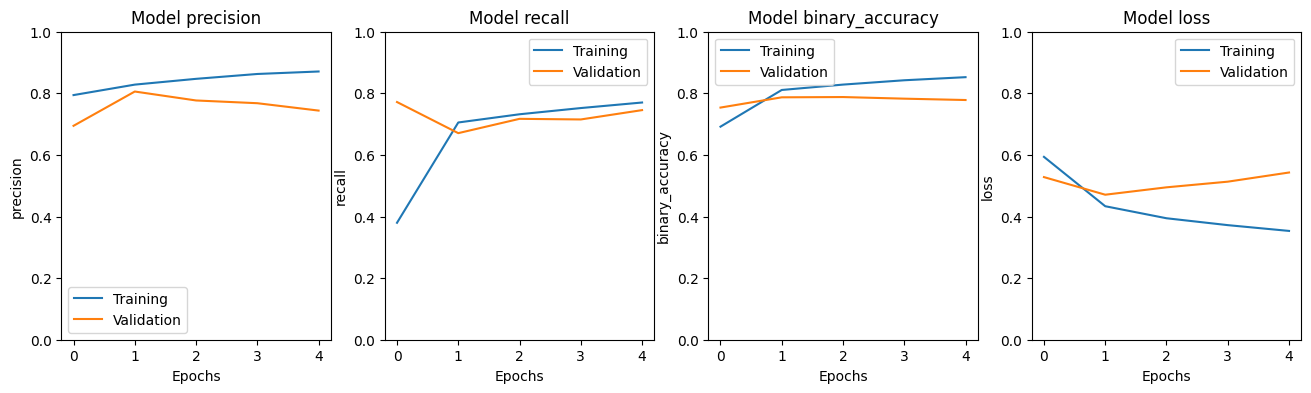

In [18]:
graph_metrics = ["precision", "recall", "binary_accuracy", "loss"]
# graph_metrics = ["binary_accuracy", "loss"]

fig, ax = plt.subplots(1, len(graph_metrics), figsize=(16, 4))
ax = ax.ravel()

for i, metric in enumerate(graph_metrics):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model " + metric)
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["Training", "Validation"])
    ax[i].set_ylim(ymin=0, ymax=1)

This model obtained a very similar output to the previous one, but it required less training iterations.

In [20]:
testing_predictions = model.predict(testing_dataset_)
testing_prediction_labels = [round(item[0]) for item in testing_predictions.tolist()]

# Merge testing IDs and predictions and export as a CSV file.
testing_results = pd.DataFrame({"id": testing_ids, "target": testing_prediction_labels})
testing_results = testing_results.sort_values(by=['id'], ascending=True)

# Export predictions to a CSV file
testing_results.to_csv("/kaggle/working/submission2.csv", index=False)
testing_results.head()

102/102 [==============================] - 3s 5ms/step


,id,target
1662,0,0
2287,1000,0
2952,10002,1
548,10007,1
2669,10015,1


# Second Alternative Model

For comparison, we will also evaluate the result obtained when the LSTM model is not wrapped in a Bidirectional layer.

In [21]:
model = tf.keras.Sequential([
    encoder,
    layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=300,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    layers.LSTM(1),
    layers.Dense(1, activation="sigmoid")
])

# Print model's architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding_2 (Embedding)     (None, None, 300)         300000    
                                                                 
 lstm_2 (LSTM)               (None, 1)                 1208      
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 301210 (1.15 MB)
Trainable params: 301210 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Define early stop callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# Add optimizers and evaluation metrics to model
model.compile(
    optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    # optimizer=keras.optimizers.SGD(learning_rate=0.00125),
    loss="binary_crossentropy",
    # loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
             keras.metrics.BinaryAccuracy(),
             keras.metrics.Precision(name="precision"),
             keras.metrics.Recall(name="recall")
             ],
)

# Train model
history = model.fit(
    training_dataset_,
    epochs=20,
    validation_data=validation_dataset_,
    callbacks=[early_stopping_cb]
) 

Epoch 1/20
203/203 [==============================] - 15s 53ms/step - loss: 0.6808 - binary_accuracy: 0.6635 - precision: 0.7265 - recall: 0.3455 - val_loss: 0.6606 - val_binary_accuracy: 0.7415 - val_precision: 0.9000 - val_recall: 0.4545
Epoch 2/20
203/203 [==============================] - 4s 17ms/step - loss: 0.6269 - binary_accuracy: 0.7852 - precision: 0.8278 - recall: 0.6304 - val_loss: 0.6157 - val_binary_accuracy: 0.7581 - val_precision: 0.8433 - val_recall: 0.5434
Epoch 3/20
203/203 [==============================] - 3s 15ms/step - loss: 0.5900 - binary_accuracy: 0.8044 - precision: 0.8495 - recall: 0.6610 - val_loss: 0.5959 - val_binary_accuracy: 0.7739 - val_precision: 0.7926 - val_recall: 0.6485
Epoch 4/20
203/203 [==============================] - 3s 12ms/step - loss: 0.5675 - binary_accuracy: 0.8164 - precision: 0.8577 - recall: 0.6859 - val_loss: 0.5856 - val_binary_accuracy: 0.7669 - val_precision: 0.8070 - val_recall: 0.6081
Epoch 5/20
203/203 [=======================

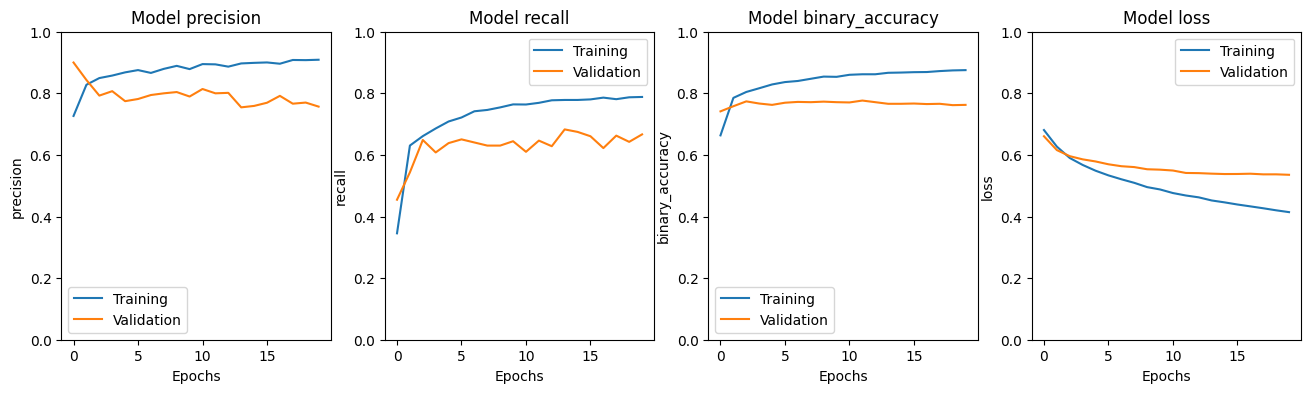

In [23]:
graph_metrics = ["precision", "recall", "binary_accuracy", "loss"]

fig, ax = plt.subplots(1, len(graph_metrics), figsize=(16, 4))
ax = ax.ravel()

for i, metric in enumerate(graph_metrics):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model " + metric)
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["Training", "Validation"])
    ax[i].set_ylim(ymin=0, ymax=1)

Once again the result is very similar to the previous models, with only a minute dicrease in trainable parameters.

In [25]:
# Obtain predicted labels for testing dataset. Round predictions to obtain 0/1 values.
testing_predictions = model.predict(testing_dataset_)
testing_prediction_labels = [round(item[0]) for item in testing_predictions.tolist()]

# Merge testing IDs and predictions and export as a CSV file.
testing_results = pd.DataFrame({"id": testing_ids, "target": testing_prediction_labels})
testing_results = testing_results.sort_values(by=['id'], ascending=True)

# Export predictions to a CSV file
testing_results.to_csv("/kaggle/working/submission3.csv", index=False)
testing_results.head()

102/102 [==============================] - 2s 4ms/step


,id,target
1662,0,0
2287,1000,1
2952,10002,1
548,10007,1
2669,10015,1


# Conclusions
The goal of classifying tweets with a RNN model was successfull, achieving a model with at least an Area Under the ROC Curve score of 0.782.

When comparing the multiple models we can conclude that, in a Regression Neural Network, changes to the global architecture such as adding Dense Layers do not have as much impact as the Regression layer itself.